In [ ]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
np.random.seed(42)
x = np.random.rand(100, 1)
y = 1 + 2 * x + .1 * np.random.randn(100, 1)

# Shuffles the indices
idx = np.arange(100)
np.random.shuffle(idx)

In [ ]:
# Uses first 80 random indices for train
train_idx = idx[:80]
# Uses the remaining indices for validation
val_idx = idx[80:]

# Generates train and validation sets
numpy_x_train, numpy_y_train = x[train_idx], y[train_idx]
numpy_x_val, numpy_y_val = x[val_idx], y[val_idx]

In [ ]:
# Converts numpy arrays to tensor
x_train = torch.from_numpy(numpy_x_train).float()
y_train = torch.from_numpy(numpy_y_train).float()

# Sets learning rate
lr = 1e-1

# Defines model with nn.Sequential
class LinRegModel(torch.nn.Module):
    def __init__(self):
        super().__init__()
        # Inputs to 1st hidden layer linear transformation 
        self.neuron = torch.nn.Linear(1, 1)
        
    def forward(self, x):
        y = self.neuron(x)
        return y
lreg_model2 = LinRegModel()        
lreg_model2.train()

# Defines optimizer
optimizer = torch.optim.SGD(lreg_model2.parameters(), lr=lr)

# Defines MSE loss
loss_fn = torch.nn.MSELoss()

# Defines number of epochs
n_epochs = 1000

for epoch in range(n_epochs):
    # Computes our model's predicted output
    yhat = lreg_model2(x_train)
    
    # How wrong is our model? That's the error! 
    # error = (y_train - yhat)
    # It is a regression, so it computes mean squared error (MSE)
    loss = loss_fn(yhat, y_train)

    # Computes gradients for both "a" and "b" parameters
    loss.backward()  # simple!

    # Updates parameters using gradients and the learning rate
    optimizer.step()  # simple!

    # Resets gradients!
    optimizer.zero_grad()
print(lreg_model2.state_dict())

OrderedDict([('neuron.weight', tensor([[1.9690]])), ('neuron.bias', tensor([1.0235]))])


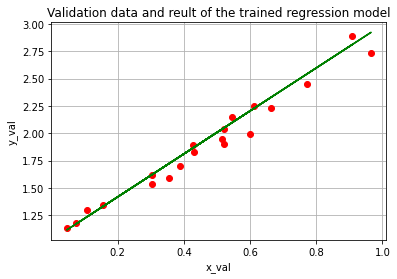

In [ ]:
plt.plot(numpy_x_val, numpy_y_val, 'ro')
plt.title('Validation data and reult of the trained regression model')
plt.grid()
plt.xlabel('x_val')
plt.ylabel('y_val')

# Final regression model
yhat = lreg_model2((torch.from_numpy(numpy_x_val).float()))
plt.plot(numpy_x_val, yhat.detach().numpy(), 'g')